<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex2_2_ann_rg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
class skeras:
    def save_history_history(fname, history_history, fold=''):
        np.save(os.path.join(fold, fname), history_history)


    def load_history_history(fname, fold=''):
        history_history = np.load(os.path.join(fold, fname)).item(0)
        return history_history


    def plot_acc(history, title=None):
        # summarize history for accuracy
        if not isinstance(history, dict):
            history = history.history

        plt.plot(history['accuracy'])
        plt.plot(history['val_accuracy'])
        if title is not None:
            plt.title(title)
        plt.ylabel('Accracy')
        plt.xlabel('Epoch')
        plt.legend(['Training data', 'Validation data'], loc=0)
        # plt.show()


    def plot_loss(history, title=None):
        # summarize history for loss
        if not isinstance(history, dict):
            history = history.history

        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        if title is not None:
            plt.title(title)
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training data', 'Validation data'], loc=0)
        # plt.show()


    def plot_history(history):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plot_acc(history)
        plt.subplot(1, 2, 2)
        plot_loss(history)


    def plot_loss_acc(history):
        plot_loss(history, '(a) Loss trajectory')
        plt.show()
        plot_acc(history, '(b) Accracy trajectory')
        plt.show()


    def plot_acc_loss(history):
        plot_acc(history, '(a) Accracy trajectory')
        plt.show()
        plot_loss(history, '(b) Loss trajectory')
        plt.show()

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 - 0s - loss: 538.9766 - val_loss: 384.7793
Epoch 2/100
323/323 - 0s - loss: 196.5070 - val_loss: 102.4499
Epoch 3/100
323/323 - 0s - loss: 97.7361 - val_loss: 85.0914
Epoch 4/100
323/323 - 0s - loss: 74.0675 - val_loss: 79.3383
Epoch 5/100
323/323 - 0s - loss: 77.2540 - val_loss: 62.3213
Epoch 6/100
323/323 - 0s - loss: 64.4019 - val_loss: 63.3919
Epoch 7/100
323/323 - 0s - loss: 65.4387 - val_loss: 59.6189
Epoch 8/100
323/323 - 0s - loss: 57.4938 - val_loss: 50.0708
Epoch 9/100
323/323 - 0s - loss: 45.5186 - val_loss: 47.0668
Epoch 10/100
323/323 - 0s - loss: 44.6966 - val_loss: 70.2793
Epoch 11/100
323/323 - 0s - loss: 49.1281 - val_loss: 54.6800
Epoch 12/100
323/323 - 0s - loss: 59.2964 - val_loss: 43.3595
Epoch 13/100
323/323 - 0s - loss: 39.4450 - val_loss: 42.5442
Epoch 14/100
323/323 - 0s - loss: 38.5628 - val_loss: 55.8836
Epoch 15/100
323/323 - 0s - loss: 41.8087 - val_loss: 37.9033
Epoch 16/100
323/323 - 0s - lo

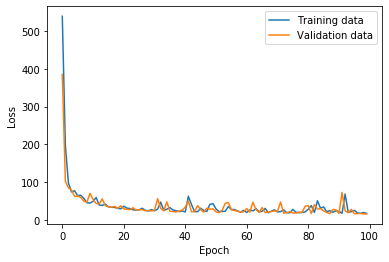

In [4]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)


def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))

    skeras.plot_loss(history)
    plt.show()


if __name__ == '__main__':
    main()